## Project Overview
##### The sentiment analysis in this project is focused on text data, specifically tweets, which are categorized into different sentiments. This notebook demonstrates how to load, preprocess, and analyze a dataset of tweets to extract valuable insights regarding public opinion.

### Features
##### - Data Loading: The dataset of tweets is loaded for analysis.
##### - Data Preprocessing: Various data cleaning and preprocessing steps are applied to make the text suitable for sentiment analysis.
##### - Exploratory Data Analysis (EDA): The notebook includes visualizations and statistical analyses of the dataset.
##### - Modeling: Sentiment analysis is performed using various natural language processing (NLP) techniques.
##### - Results: The final sentiment classifications are displayed, and insights are provided based on the results.

### Requirements
##### To run the notebook, the following Python libraries are required:
##### - pandas
##### - numpy
##### - matplotlib
##### - seaborn
##### - scikit-learn
##### - nltk
##### - tensorflow (for advanced models, if used)

##### You can install these dependencies using pip:
#### pip install pandas numpy matplotlib seaborn scikit-learn nltk tensorflow

### Dataset
##### The dataset used in this notebook contains the following columns:
##### - ID: A unique identifier for each tweet.
##### - Topic: The topic of the tweet (in this case, there are different companies Like Amazon, Nividia, Microsoft , Verizon etc).
##### - Sentiment: The sentiment label (Positive, Negative, Neutral).
##### - Tweet: The actual text of the tweet.

## Results
#### The sentiment analysis results include predictions for each tweet's sentiment, which can be used to understand the general perception of those companies on social media.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = pd.read_csv('twitter_training.csv', names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)
dt.head(10)

ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2401  Borderlands  Positive   
6  2402  Borderlands  Positive   
7  2402  Borderlands  Positive   
8  2402  Borderlands  Positive   
9  2402  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
5  im getting into borderlands and i can murder y...  
6  So I spent a few hours making something for fu...  
7  So I spent a couple of hours doing something f...  
8  So I spent a few hours doing something for fun...  
9  So I spent a few hours making something for fu...

In [3]:
dt.tail(10)

ID   Topic Sentiment  \
74672  9199  Nvidia  Positive   
74673  9199  Nvidia  Positive   
74674  9199  Nvidia  Positive   
74675  9199  Nvidia  Positive   
74676  9200  Nvidia  Positive   
74677  9200  Nvidia  Positive   
74678  9200  Nvidia  Positive   
74679  9200  Nvidia  Positive   
74680  9200  Nvidia  Positive   
74681  9200  Nvidia  Positive   

                                                   Tweet  
74672  Let no elite go unnoticed... NVIDIA Highlights...  
74673  Let no elim go unnoticed.... NVIDIA Highlights...  
74674  Let a no information elim that go unnoticed......  
74675  <unk> my elim be no.... NVIDIA Highlights Pict...  
74676  Just realized the windows partition of my Mac ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...

In [4]:
dt.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [5]:
dt.index

RangeIndex(start=0, stop=74682, step=1)

In [6]:
dt.shape

(74682, 4)

In [7]:
dt.size

298728

In [8]:
dt.describe()

ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000

In [9]:
dt.isna().sum()

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [12]:
# Perform sentiment analysis
dt['Polarity'] = dt['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
dt['Sentiment_Label'] = dt['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

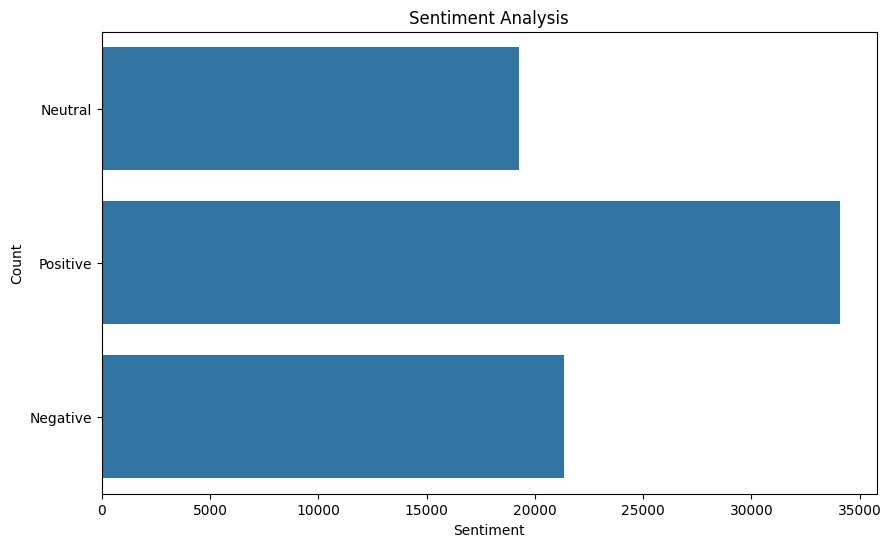

In [13]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(dt['Sentiment_Label'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

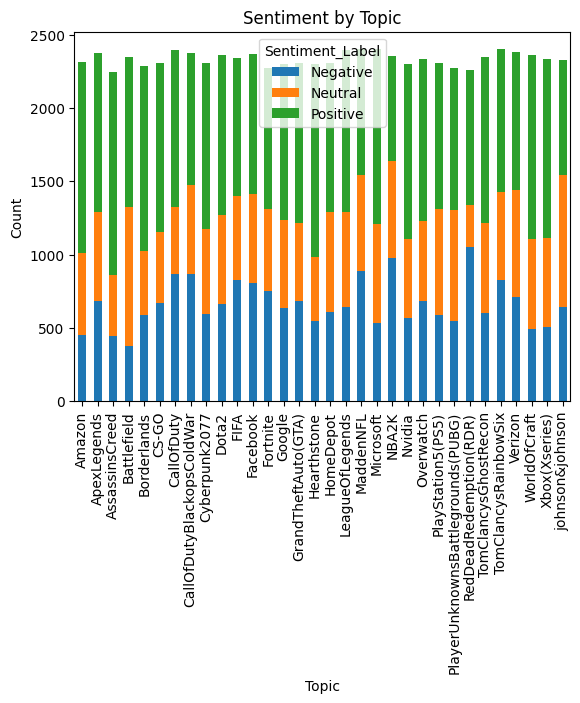

In [14]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = dt.groupby(['Topic', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

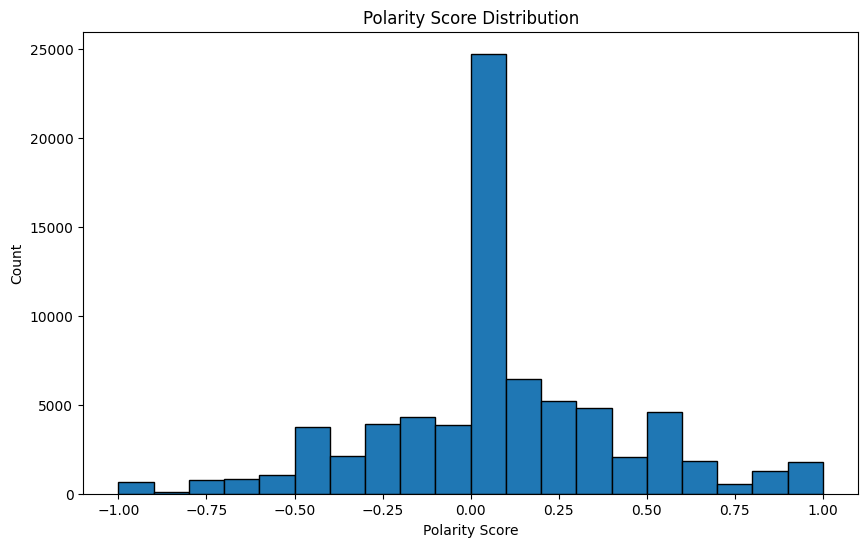

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(dt['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

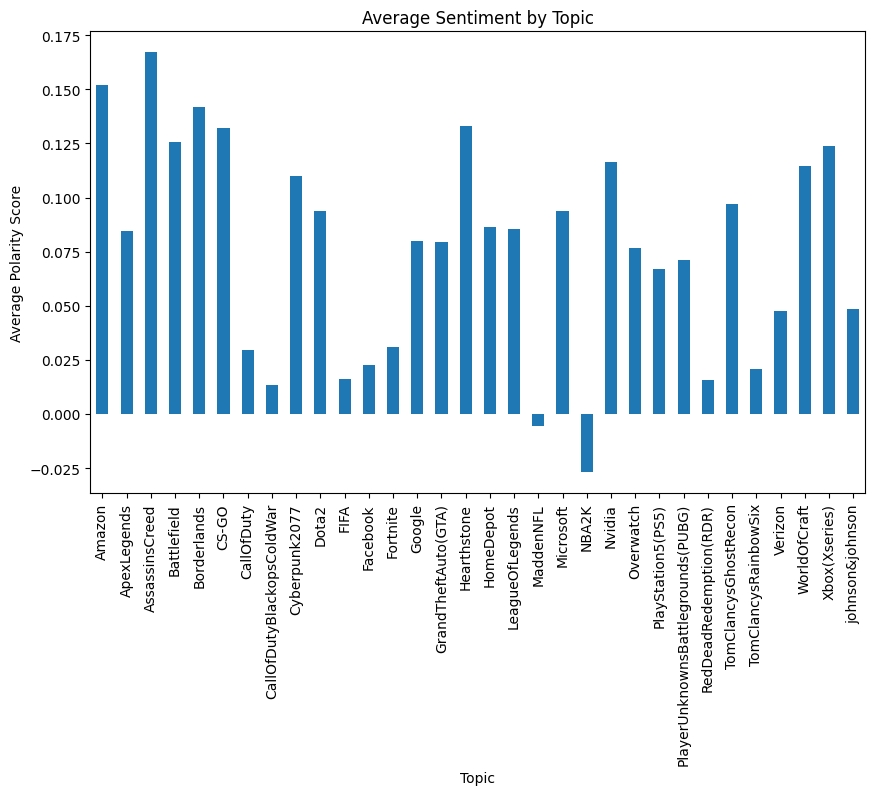

In [16]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = dt.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

In [17]:
# Visualize the most positive and negative tweets
most_positive_tweet = dt[dt['Polarity'] == dt['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = dt[dt['Polarity'] == dt['Polarity'].min()]['Tweet'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        return ''
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

dt['Processed_Tweet'] = dt['Tweet'].apply(preprocess_text)

# Vectorize the preprocessed tweets
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(dt['Processed_Tweet'])




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Apply LDA topic modeling
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print("LDA Topics:")
print_top_words(lda, vectorizer.get_feature_names_out(), 10)

# Apply NMF topic modeling
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf)

print("\nNMF Topics:")
print_top_words(nmf, vectorizer.get_feature_names_out(), 10)

LDA Topics:
Topic #1:
johnson player wow com ban best battlefield nice game baby

Topic #2:
dead red game com redemption playstation creed pic fifa twitter

Topic #3:
wtf shit game like com rhandlerr pic twitter tv twitch

Topic #4:
com good facebook fucking pic time twitter nvidia damn league

Topic #5:
unk love game fuck wait fun really amazon play home


NMF Topics:
Topic #1:
game good like shit fuck play really fucking time best

Topic #2:
unk wow wtf johnson playstation verizon com happy home pubg

Topic #3:
com pic twitter rhandlerr player ban johnson battlefield bf4db facebook

Topic #4:
love new world warcraft guys playing god borderlands people games

Topic #5:
dead red redemption tv redeeming twitch rockstargames games online story



In [24]:
# using text blob algorithm

from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    # Handle potential float values
    if isinstance(text, float):
        return 0.0
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'Tweet' column
dt['Sentiment'] = dt['Tweet'].apply(get_sentiment)

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

dt['Sentiment_Category'] = dt['Sentiment'].apply(categorize_sentiment)

# Print the sentiment analysis results
dt[['Tweet', 'Sentiment', 'Sentiment_Category']]


Tweet  Sentiment  \
0      im getting on borderlands and i will murder yo...       0.00   
1      I am coming to the borders and I will kill you...       0.00   
2      im getting on borderlands and i will kill you ...       0.00   
3      im coming on borderlands and i will murder you...       0.00   
4      im getting on borderlands 2 and i will murder ...       0.00   
...                                                  ...        ...   
74677  Just realized that the Windows partition of my...      -0.40   
74678  Just realized that my Mac window partition is ...      -0.40   
74679  Just realized the windows partition of my Mac ...      -0.40   
74680  Just realized between the windows partition of...      -0.05   
74681  Just like the windows partition of my Mac is l...      -0.40   

      Sentiment_Category  
0                Neutral  
1                Neutral  
2                Neutral  
3                Neutral  
4                Neutral  
...                  ...  
74677           Negative  
74678           Negative  
74679           Negative  
74680           Negative  
74681           Negative  

[74682 rows x 3 columns]

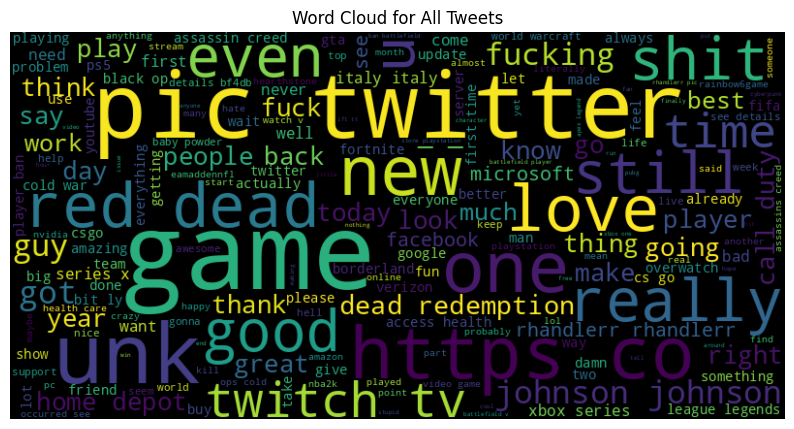

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for the entire dataset
all_words = ' '.join(dt['Processed_Tweet'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for All Tweets')
plt.show()


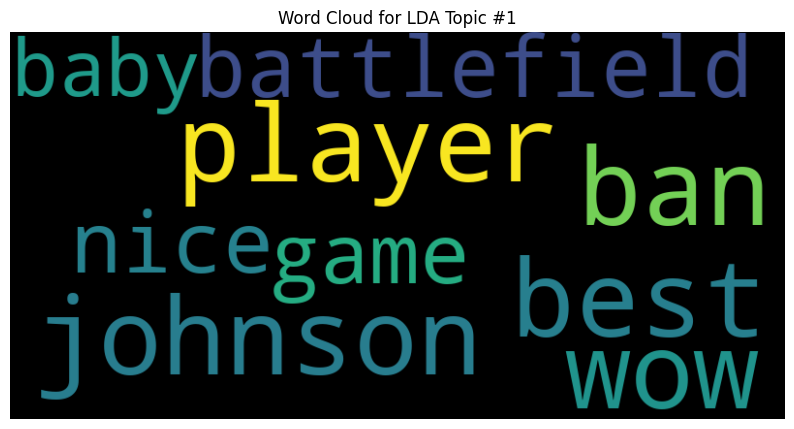

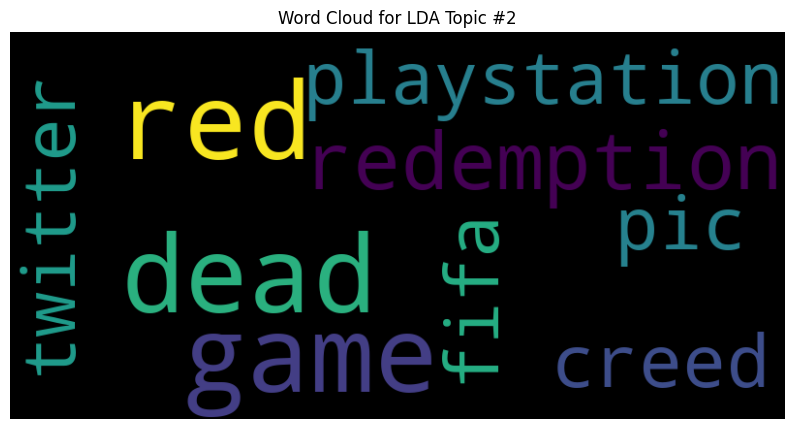

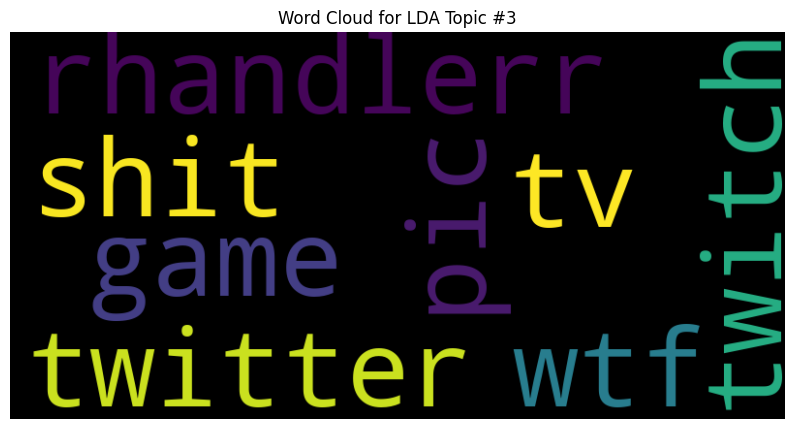

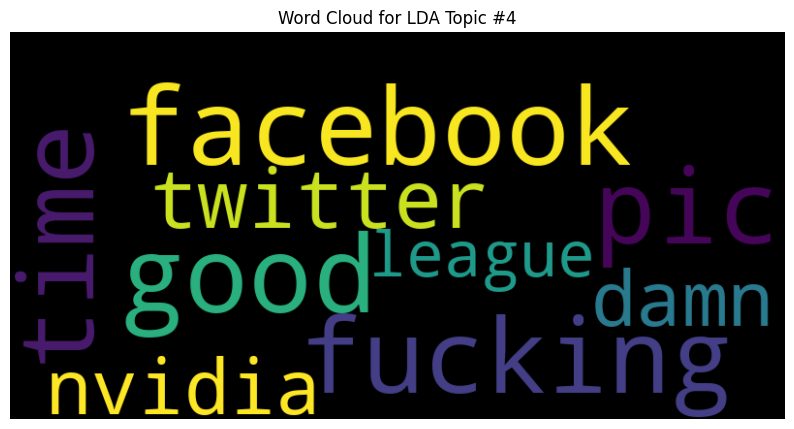

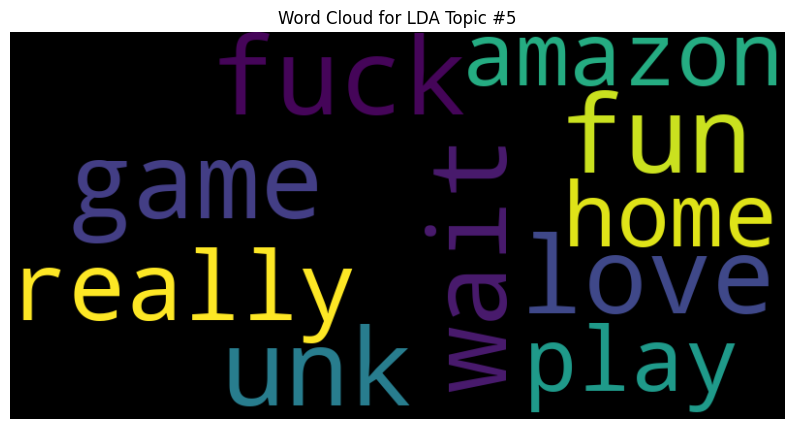

In [28]:
# Create word clouds for each topic (LDA)
for topic_idx, topic in enumerate(lda.components_):
    top_words = " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(top_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for LDA Topic #{topic_idx + 1}')
    plt.show()

In [ ]:
# My data has no likes and retweet folder
# Assuming I have a DataFrame 'dt' with columns like 'User', 'Followers', 'Retweets', 'Likes':

# Calculate an influence score
dt['Influence_Score'] = dt['Followers'] + dt['Retweets'] * 2 + dt['Likes']

# Sort users by influence score
top_influencers = dt.sort_values('Influence_Score', ascending=False)

# Print the top influencers
print(top_influencers[['User', 'Influence_Score']].head(10))
